# Trabalhando com a base SCR em painel

# Análise Descritiva

## 1. Importando as Bibliotecas

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import math
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format # show only two digits
pd.set_option('display.max_columns', 100) # show up to 100 columns
np.random.seed(2023)

### 2.1 – Inspecionar visualmente o conjunto de dados

In [2]:
df = pd.read_csv('dataframe_PF.csv')
#df = pd.read_csv('anual_PF.csv')

In [3]:
df.shape

(1121395, 24)

In [4]:
df.head()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,﻿data_base
0,2012-06-30,AC,Bancário,NaN,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Prefixado,26,"34245,51","90249,48","225967,36","169241,66","206754,08","54000,51","10249,67","790708,27","78745,89","84224,82",NaN
1,2012-06-30,AC,Bancário,NaN,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,45,"223649,51","590710,56","1432633,39","987265,82","477876,55","0,00","12181,13","3724316,96","116526,89","123671,03",NaN
2,2012-06-30,AC,Bancário,NaN,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Sem destinação específica,Prefixado,<= 15,"7036,64","11528,43","0,00","0,00","0,00","0,00","2195,28","20760,35","0,00","18071,06",NaN
3,2012-06-30,AC,Bancário,NaN,PF,PF - Autônomo,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Prefixado,53,"76387,09","193813,29","499462,93","473222,14","967987,34","115717,12","6641,69","2333231,60","22105,44","236600,78",NaN
4,2012-06-30,AC,Bancário,NaN,PF,PF - Autônomo,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,88,"463233,26","1237197,87","3277782,08","2956557,11","2991850,37","214569,50","31625,06","11172815,25","34605,73","875026,84",NaN


Ao juntar os dataframes dos meses, a base ficou com 2 colunas data_base.

In [5]:
unique_coluna = df['data_base'].unique()
print(unique_coluna)

['2012-06-30' '2012-07-31' '2012-08-31' '2012-09-30' '2012-10-31'
 '2012-11-30' '2012-12-31' '2013-01-31' '2013-02-28' '2013-03-31'
 '2013-04-30' '2013-05-31' '2013-06-30' '2013-07-31' '2013-08-31'
 '2013-09-30' '2013-10-31' '2013-11-30' '2013-12-31' '2014-01-31'
 '2014-02-28' '2014-03-31' '2014-04-30' '2014-05-31' '2014-06-30'
 '2014-07-31' '2014-08-31' '2014-09-30' '2014-10-31' '2014-11-30'
 '2014-12-31' '2015-01-31' '2015-02-28' '2015-03-31' '2015-04-30'
 '2015-05-31' '2015-06-30' '2015-07-31' '2015-08-31' '2015-09-30'
 '2015-10-31' '2015-11-30' '2015-12-31' '2016-01-31' '2016-02-29'
 '2016-03-31' '2016-04-30' '2016-05-31' '2016-06-30' '2016-07-31'
 '2016-08-31' '2016-09-30' '2016-10-31' '2016-11-30' '2016-12-31'
 '2017-01-31' '2017-02-28' '2017-03-31' '2017-04-30' '2017-05-31'
 '2017-06-30' '2017-07-31' '2017-08-31' '2017-09-30' '2017-10-31'
 '2017-11-30' '2017-12-31' '2018-01-31' '2018-02-28' '2018-03-31'
 '2018-04-30' '2018-05-31' '2018-06-30' '2018-07-31' '2018-08-31' nan
 '2018

In [6]:
numero_de_valores_unicos = df['data_base'].nunique()
print(f"O número de valores únicos na coluna 'coluna_name' é: {numero_de_valores_unicos}")

O número de valores únicos na coluna 'coluna_name' é: 134


In [7]:
numero_de_nans = df['data_base'].isna().sum()

# Usando isnull()
# numero_de_nans = df['coluna_name'].isnull().sum()

print(f"O número de valores NaN na coluna 'coluna_name' é: {numero_de_nans}")

O número de valores NaN na coluna 'coluna_name' é: 23624


In [8]:
df.describe()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,﻿data_base
count,1097771,1121395,1121395,814859,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,23624
unique,134,27,3,5,1,8,1,1,9,1,2,5,22348,939854,945178,968016,930791,932349,759228,521837,1110294,327795,427094,3
top,2023-05-31,SP,Bancário,S1,PF,PF - Servidor ou empregado público,-,-,PF - Mais de 5 a 10 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,<= 15,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","22230,63","0,00","0,00",2018-11-30
freq,12600,83319,900800,424094,1121395,201983,1121395,1121395,187086,1121395,798342,623250,752204,5382,8350,21903,64966,123649,356390,538258,39,787788,682982,7964


In [9]:
# Excluindo as colunas que só possuem 1 valor
colunas_para_excluir = ['cliente', 'cnae_secao', 'cnae_subclasse', 'modalidade']

df = df.drop(columns=colunas_para_excluir)

In [10]:
df.shape

(1121395, 20)

Verificamos que os valores de data_base faltantes na primeira coluna, estão na última, então iremos juntar todos na primeira coluna e excluir a última

In [11]:
indices_nan = df[df['data_base'].isna()].index

# Em seguida, preencha os valores NaN na primeira coluna 'data_base' com os valores da última coluna 'data_base'.
df.loc[indices_nan, 'data_base'] = df['data_base'].iloc[-1]


In [12]:
df = df.iloc[:, :-1]

In [13]:
df.describe()

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
count,1121395,1121395,1121395,814859,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395
unique,134,27,3,5,8,9,2,5,22348,939854,945178,968016,930791,932349,759228,521837,1110294,327795,427094
top,2023-10-31,SP,Bancário,S1,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,Com destinação específica,Pós-fixado,<= 15,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","22230,63","0,00","0,00"
freq,36126,83319,900800,424094,201983,187086,798342,623250,752204,5382,8350,21903,64966,123649,356390,538258,39,787788,682982


In [14]:

df['data_base'] = pd.to_datetime(df['data_base'])
df['data_base'] = df['data_base'].dt.strftime('%m-%Y')

### 2.2 - Verificando colunas e tipos de dados

In [15]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121395 entries, 0 to 1121394
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   data_base                       1121395 non-null  object
 1   uf                              1121395 non-null  object
 2   tcb                             1121395 non-null  object
 3   sr                              814859 non-null   object
 4   ocupacao                        1121395 non-null  object
 5   porte                           1121395 non-null  object
 6   origem                          1121395 non-null  object
 7   indexador                       1121395 non-null  object
 8   numero_de_operacoes             1121395 non-null  object
 9   a_vencer_ate_90_dias            1121395 non-null  object
 10  a_vencer_de_91_ate_360_dias     1121395 non-null  object
 11  a_vencer_de_361_ate_1080_dias   1121395 non-null  object
 12  a_vencer_de_10

Apenas o sr possui valores nulos. todos estão como objeto


### 2.3 - Verificando estatísticas básicas - primeira visão sobre distribuições

In [16]:
df.describe()

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
count,1121395,1121395,1121395,814859,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395
unique,134,27,3,5,8,9,2,5,22348,939854,945178,968016,930791,932349,759228,521837,1110294,327795,427094
top,10-2023,SP,Bancário,S1,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,Com destinação específica,Pós-fixado,<= 15,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","22230,63","0,00","0,00"
freq,36126,83319,900800,424094,201983,187086,798342,623250,752204,5382,8350,21903,64966,123649,356390,538258,39,787788,682982


In [17]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index([], dtype='object')
Index(['data_base', 'uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem',
       'indexador', 'numero_de_operacoes', 'a_vencer_ate_90_dias',
       'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias',
       'a_vencer_de_1081_ate_1800_dias', 'a_vencer_de_1801_ate_5400_dias',
       'a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico'],
      dtype='object')
Index([], dtype='object')


## Checando valores nulos

In [18]:
df.isnull().sum()

data_base                              0
uf                                     0
tcb                                    0
sr                                306536
ocupacao                               0
porte                                  0
origem                                 0
indexador                              0
numero_de_operacoes                    0
a_vencer_ate_90_dias                   0
a_vencer_de_91_ate_360_dias            0
a_vencer_de_361_ate_1080_dias          0
a_vencer_de_1081_ate_1800_dias         0
a_vencer_de_1801_ate_5400_dias         0
a_vencer_acima_de_5400_dias            0
vencido_acima_de_15_dias               0
carteira_ativa                         0
carteira_inadimplida_arrastada         0
ativo_problematico                     0
dtype: int64

A unica coluna com valor nulo é SR, que só tem valor a partir de 2017

In [19]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

data_base : ['06-2012' '07-2012' '08-2012' '09-2012' '10-2012' '11-2012' '12-2012'
 '01-2013' '02-2013' '03-2013' '04-2013' '05-2013' '06-2013' '07-2013'
 '08-2013' '09-2013' '10-2013' '11-2013' '12-2013' '01-2014' '02-2014'
 '03-2014' '04-2014' '05-2014' '06-2014' '07-2014' '08-2014' '09-2014'
 '10-2014' '11-2014' '12-2014' '01-2015' '02-2015' '03-2015' '04-2015'
 '05-2015' '06-2015' '07-2015' '08-2015' '09-2015' '10-2015' '11-2015'
 '12-2015' '01-2016' '02-2016' '03-2016' '04-2016' '05-2016' '06-2016'
 '07-2016' '08-2016' '09-2016' '10-2016' '11-2016' '12-2016' '01-2017'
 '02-2017' '03-2017' '04-2017' '05-2017' '06-2017' '07-2017' '08-2017'
 '09-2017' '10-2017' '11-2017' '12-2017' '01-2018' '02-2018' '03-2018'
 '04-2018' '05-2018' '06-2018' '07-2018' '08-2018' '10-2023' '12-2018'
 '01-2019' '02-2019' '03-2019' '04-2019' '05-2019' '06-2019' '07-2019'
 '08-2019' '09-2019' '10-2019' '11-2019' '12-2019' '01-2020' '02-2020'
 '03-2020' '04-2020' '05-2020' '06-2020' '07-2020' '08-2020' '09-

## 4. Verificando distribuições de dados

Antes de analisar a distrubuição dos dados, precisamos tratar de 2 problemas dnos dados:
+ Os dados numéricos estão como objetos
+ A colunas número de perações possui valores '<= 15' para as instâncias com menos de 15 operações
+ Os dados estão agrupados pelas variáveis categóricas



#### Transformando os dados em numéricos

In [20]:
# Excluindo as colunas que não irei usar
colunas_para_excluir = ['a_vencer_ate_90_dias', 'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias', 'a_vencer_de_1801_ate_5400_dias','a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias', 'a_vencer_de_1081_ate_1800_dias' ]

df = df.drop(columns=colunas_para_excluir)

In [21]:
df['carteira_ativa'] = df['carteira_ativa'].str.replace(',', '.').astype(float)
df['carteira_inadimplida_arrastada'] = df['carteira_inadimplida_arrastada'].str.replace(',', '.').astype(float)
df['ativo_problematico'] = df['ativo_problematico'].str.replace(',', '.').astype(float)


In [22]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index(['carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico'],
      dtype='object')
Index(['data_base', 'uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem',
       'indexador', 'numero_de_operacoes'],
      dtype='object')
Index([], dtype='object')


#### Tratando o problema dos contratos <=15

A coluna numero_de_operaçoes apresenta o valor '<= 15" quando a instancia apresenta menos de 15 contratos, algumas soluções foram elencadas para tratar o problema:
1. fazer uma média do valor dos contratos por porte e ano e dividir a carteira dessas instancias pelo valor medio dos contratos para estimar a quantidade de contratos, limitando a 15, quando o resultado for maior que 15. (df_tratada)
2. desconsiderar as instancias com menos que 15 contratos (df_sup15)
3. desconsiderar a coluna de numero de operações

In [23]:
#Contar quantas linhas tem numero de operações <=15
numero_de_linhas_com_menor_ou_igual_a_15 = (df['numero_de_operacoes']=='<= 15').sum()

print(f"O número de linhas com 'numero_de_operacoes' <= 15 é: {numero_de_linhas_com_menor_ou_igual_a_15}")

O número de linhas com 'numero_de_operacoes' <= 15 é: 752204


In [24]:
# Opção 1: Excluir linhas
linhas_filtradas = df[df['numero_de_operacoes'] == '<= 15']

# Somar os valores da coluna 'carteira_ativa' nas linhas filtradas
soma_carteira_ativa_menor_15 = linhas_filtradas['carteira_ativa'].sum()
soma_carteira_ativa = df['carteira_ativa'].sum()
print(soma_carteira_ativa_menor_15)
print(soma_carteira_ativa)
percentual =soma_carteira_ativa_menor_15/soma_carteira_ativa
print(percentual)

447174069381.40027
79633832039363.05
0.005615378011199585


Apesar da grande quantidade de linhas com menos de 15 contratos, em valor de carteira, representam apenas 0,56% do total do valor dos emprestimos

In [25]:
df_sup15= df[df['numero_de_operacoes'] != '<= 15']

In [26]:
df.columns

Index(['data_base', 'uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem',
       'indexador', 'numero_de_operacoes', 'carteira_ativa',
       'carteira_inadimplida_arrastada', 'ativo_problematico'],
      dtype='object')

In [27]:
# Opção 2: estimar valores

In [28]:
data_base = pd.to_datetime(df['data_base'])



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121395 entries, 0 to 1121394
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   data_base                       1121395 non-null  object 
 1   uf                              1121395 non-null  object 
 2   tcb                             1121395 non-null  object 
 3   sr                              814859 non-null   object 
 4   ocupacao                        1121395 non-null  object 
 5   porte                           1121395 non-null  object 
 6   origem                          1121395 non-null  object 
 7   indexador                       1121395 non-null  object 
 8   numero_de_operacoes             1121395 non-null  object 
 9   carteira_ativa                  1121395 non-null  float64
 10  carteira_inadimplida_arrastada  1121395 non-null  float64
 11  ativo_problematico              1121395 non-null  float64
dtype

In [30]:
#Vamos descobrir o valor medio dos contratos por porte, para estimar a quantoidade de contratos em que a quantidade é <=15, a intuição é que as pessoas tendem a comprar imóveis no valor maximo que conseguem, sendo o principal limitador a renda
#inicialmente vamos fazer um novo dataframe só com as linhas com contratos com >15
df2=df.loc[df['numero_de_operacoes'] != '<= 15']

In [31]:
df2['numero_de_operacoes'] = df2['numero_de_operacoes'].astype(int)


In [32]:
df2['media_contratos']=df2['carteira_ativa']/df2['numero_de_operacoes']

In [33]:
# Converta a coluna 'data_base' para o tipo datetime
df2['data_base'] = pd.to_datetime(df2['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df2['ano'] = df2['data_base'].dt.year

In [34]:
# Use o método groupby para agrupar os dados por 'uf' e 'ano' e, em seguida, calcule a média
#media_por_uf_ano = df2.groupby(['uf', 'ano'])['media_contratos'].mean()
media_por_porte = df2.groupby(['porte', 'ano'])['media_contratos'].mean().reset_index()

In [35]:
media_por_porte

,porte,ano,media_contratos
0,PF - Acima de 20 salários mínimos,2012,116593.10
1,PF - Acima de 20 salários mínimos,2013,151819.37
2,PF - Acima de 20 salários mínimos,2014,234763.46
3,PF - Acima de 20 salários mínimos,2015,306536.30
4,PF - Acima de 20 salários mínimos,2016,313252.27
...,...,...,...
102,PF - Sem rendimento,2019,103211.03
103,PF - Sem rendimento,2020,118028.65
104,PF - Sem rendimento,2021,145626.88
105,PF - Sem rendimento,2022,178836.98


In [36]:
#Fazer um novo data frame com as linhas com numero de contratos <=15
df3=df.loc[df['numero_de_operacoes'] == '<= 15']

In [37]:
# Converta a coluna 'data_base' para o tipo datetime
df3['data_base'] = pd.to_datetime(df3['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df3['ano'] = df3['data_base'].dt.year

In [38]:
# Realize a junção dos DataFrames usando a coluna 'uf' e 'ano' como chave
#df3 = df3.merge(media_por_uf_ano.reset_index(), on=['porte', 'uf'], how='left')
df3 = df3.merge(media_por_porte.reset_index(), on=['porte','ano'], how='left')

# Renomeie a coluna resultante para 'media_contratos'
df3.rename(columns={'media_contratos': 'media_contratos'}, inplace=True)


In [39]:
df3.tail(3)

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,ano,index,media_contratos
752201,2023-10-01,TO,Não bancário,S3,PF - Servidor ou empregado público,PF - Mais de 3 a 5 salários mínimos,Com destinação específica,Prefixado,<= 15,27187.57,0.00,0.00,2023,82,134688.23
752202,2023-10-01,TO,Não bancário,S3,PF - Servidor ou empregado público,PF - Mais de 3 a 5 salários mínimos,Com destinação específica,Índices de preços,<= 15,1223076.49,318102.30,325423.08,2023,82,134688.23
752203,2023-10-01,TO,Não bancário,S3,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,Com destinação específica,Prefixado,<= 15,181623.37,0.00,0.00,2023,94,177495.31


In [40]:
df3['numero_de_operacoes'] =df3['carteira_ativa']/df3['media_contratos'] 

In [41]:
media_por_porte.isnull().sum()

porte              0
ano                0
media_contratos    0
dtype: int64

In [42]:
df3.isnull().sum()

data_base                              0
uf                                     0
tcb                                    0
sr                                182937
ocupacao                               0
porte                                  0
origem                                 0
indexador                              0
numero_de_operacoes                    0
carteira_ativa                         0
carteira_inadimplida_arrastada         0
ativo_problematico                     0
ano                                    0
index                                  0
media_contratos                        0
dtype: int64

In [43]:
# Arredonde os valores para cima e converta-os para inteiros
df3['numero_de_operacoes'] = df3['numero_de_operacoes'].apply(lambda x: math.ceil(x)).astype(int)

In [44]:
#atribuir valor 15 para as linhas em que o valor estimado for maior que 15
# Defina uma função que limita o valor a 15 se for maior ou igual a 15
def limitar_valor(valor):
    return min(valor, 15)

# Aplique a função à coluna 'numero_de_operacoes'
df3['numero_de_operacoes'] = df3['numero_de_operacoes'].apply(limitar_valor)

     

In [45]:
df3['numero_de_operacoes'].describe()

count   752204.00
mean         4.14
std          4.10
min          1.00
25%          1.00
50%          2.00
75%          5.00
max         15.00
Name: numero_de_operacoes, dtype: float64

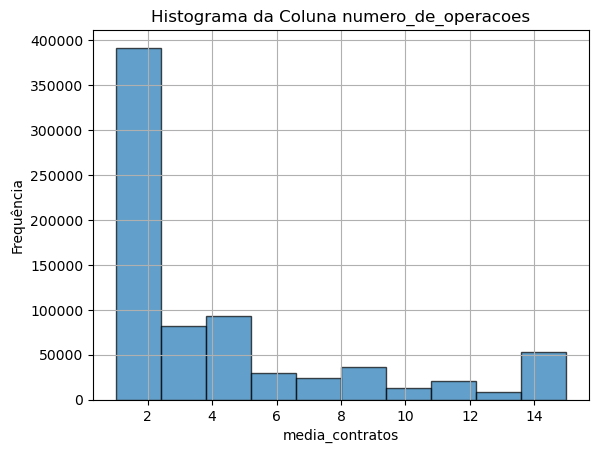

In [46]:
# Crie o histograma da coluna 'numero_de_operacoes'
plt.hist(df3['numero_de_operacoes'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('media_contratos')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna numero_de_operacoes')
plt.grid(True)

# Exiba o histograma
plt.show()

In [47]:
df_tratada=pd.concat([df2, df3])

In [48]:
df_tratada.describe()

,data_base,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,media_contratos,ano,index
count,1121395,1121395.00,1121395.00,1121395.00,1121395.00,1121395.00,1121395.00,752204.00
mean,2019-02-26 07:36:49.354954496,703.24,71013186.29,1112843.20,3692187.56,146679.08,2018.69,55.45
min,2012-06-01 00:00:00,1.00,1.29,0.00,0.00,1548.63,2012.00,0.00
25%,2016-08-01 00:00:00,2.00,136943.01,0.00,0.00,72267.81,2016.00,34.00
50%,2019-11-01 00:00:00,5.00,606963.41,0.00,0.00,112417.67,2019.00,58.00
75%,2022-01-01 00:00:00,34.00,4770688.30,50717.77,203225.22,177495.31,2022.00,80.00
max,2023-10-01 00:00:00,263225.00,26355945164.81,447024787.76,1546472951.06,3127803.10,2023.00,106.00
std,NaN,5210.98,538936445.64,7673096.58,26647580.77,110483.57,3.34,29.33


In [49]:
df_tratada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121395 entries, 0 to 752203
Data columns (total 15 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   data_base                       1121395 non-null  datetime64[ns]
 1   uf                              1121395 non-null  object        
 2   tcb                             1121395 non-null  object        
 3   sr                              814859 non-null   object        
 4   ocupacao                        1121395 non-null  object        
 5   porte                           1121395 non-null  object        
 6   origem                          1121395 non-null  object        
 7   indexador                       1121395 non-null  object        
 8   numero_de_operacoes             1121395 non-null  int64         
 9   carteira_ativa                  1121395 non-null  float64       
 10  carteira_inadimplida_arrastada  1121395 non-null

In [50]:
df_tratada = df_tratada.drop('ano', axis=1)

In [51]:
df_tratada.columns

Index(['data_base', 'uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem',
       'indexador', 'numero_de_operacoes', 'carteira_ativa',
       'carteira_inadimplida_arrastada', 'ativo_problematico',
       'media_contratos', 'index'],
      dtype='object')

In [52]:
#novo_df.shape

## Análise descritiva e gráficos

In [53]:
# Converta a coluna 'data_base' para o tipo datetime
df['data_base'] = pd.to_datetime(df['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df['ano'] = df['data_base'].dt.year

In [54]:
df_total=df.groupby(['data_base']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_total['inadimplencia']=df_total['carteira_inadimplida_arrastada']/df_total['carteira_ativa']
df_total.head()

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df_total['ano'] = df_total['data_base'].dt.year

In [55]:
df= df[df['ano'] != 2023]

In [56]:
df_total= df_total[df_total['ano'] != 2023]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


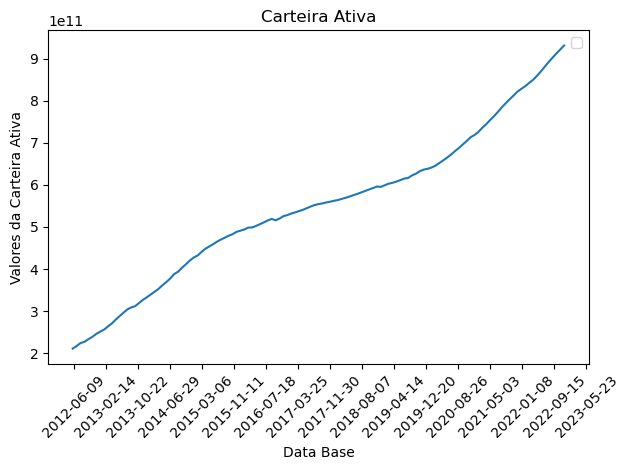

In [57]:
# Configurando os rótulos dos eixos x e y

plt.plot(df_total['data_base'], df_total['carteira_ativa'])

plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


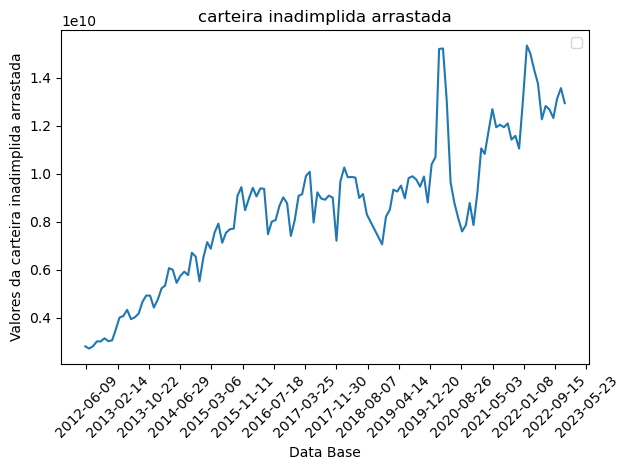

In [58]:
# Configurando os rótulos dos eixos x e y

plt.plot(df_total['data_base'], df_total['carteira_inadimplida_arrastada'])

plt.xlabel('Data Base')
plt.ylabel('Valores da carteira inadimplida arrastada')
plt.title('carteira inadimplida arrastada')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x

plt.tight_layout()
plt.show()

### Carteira ativa por renda

In [59]:
#excluir colunas'ativo_problematico','numero_de_operacoes' e criar colina 'inadimplencia'
#colunas_excluir=['ativo_problematico','numero_de_operacoes']
#df_renda=df.drop(columns=colunas_excluir)

#df['inadimplencia']=df['carteira_inadimplida_arrastada']/df['carteira_ativa']

In [60]:
#Agrupando por faixa de renda
#criar coluna 'renda'
# Função para mapear os valores da coluna "porte" para os valores da coluna "renda"
def mapear_renda(porte):
    if porte.strip() in [ 'PF - Até 1 salário mínimo', 'PF - Mais de 1 a 2 salários mínimos']:
        return "baixa"
    elif porte.strip() in ['PF - Mais de 2 a 3 salários mínimos', 'PF - Mais de 3 a 5 salários mínimos']:
        return "media"
    elif porte.strip() in ['PF - Acima de 20 salários mínimos', 'PF - Mais de 5 a 10 salários mínimos', 'PF - Mais de 10 a 20 salários mínimos']:
        return "alta"
    #elif porte.strip() in ['PF - Sem rendimento']:
    #    return "Sem Renda"    
    else:
        return "outros"  # Caso haja algum valor não mapeado

# Aplicando a função para criar a coluna "renda"
df['renda'] = df['porte'].apply(mapear_renda)

In [61]:
df_renda=df.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_renda['inadimplencia']=df_renda['carteira_inadimplida_arrastada']/df_renda['carteira_ativa']
df_renda.head()

,data_base,renda,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia
0,2012-06-01,alta,195363094665.14,2428425717.79,0.01
1,2012-06-01,baixa,3193377094.50,58937334.38,0.02
2,2012-06-01,media,2784248422.29,69141961.17,0.02
3,2012-06-01,outros,9621719479.44,255054364.17,0.03
4,2012-07-01,alta,125987979601.39,1297423023.14,0.01


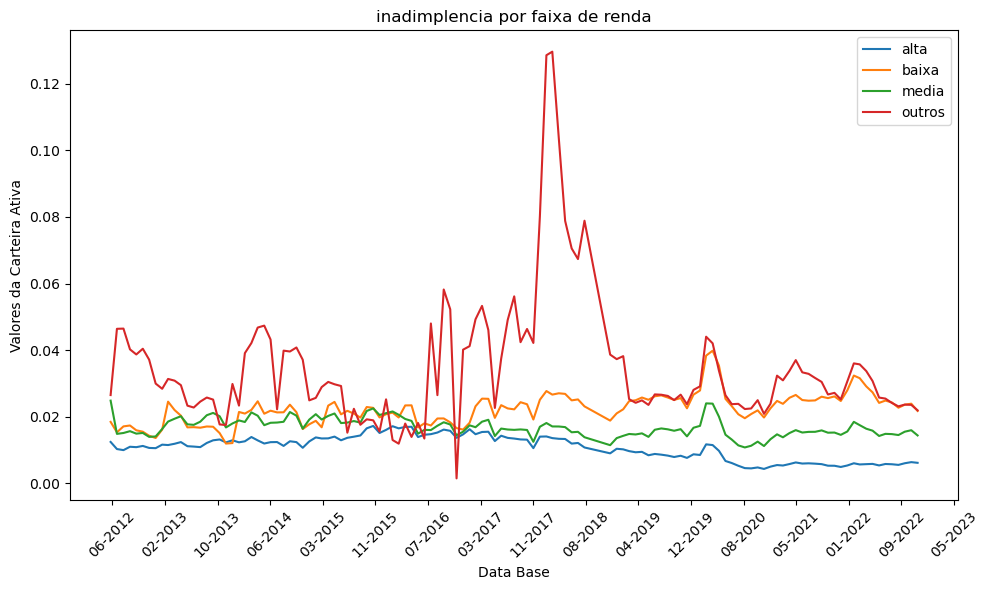

In [62]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('inadimplencia por faixa de renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('inadimplencia por faixa de renda.png')
plt.tight_layout()
plt.show()

In [63]:
#gráfico financiamento total por faixa de renda
#gráfico financiamento direcionado por faixa de renda
#gráfico financiamento não direcionado por faixa de renda

In [64]:
#vamos agrupar o porte em baixa, média e alta renda

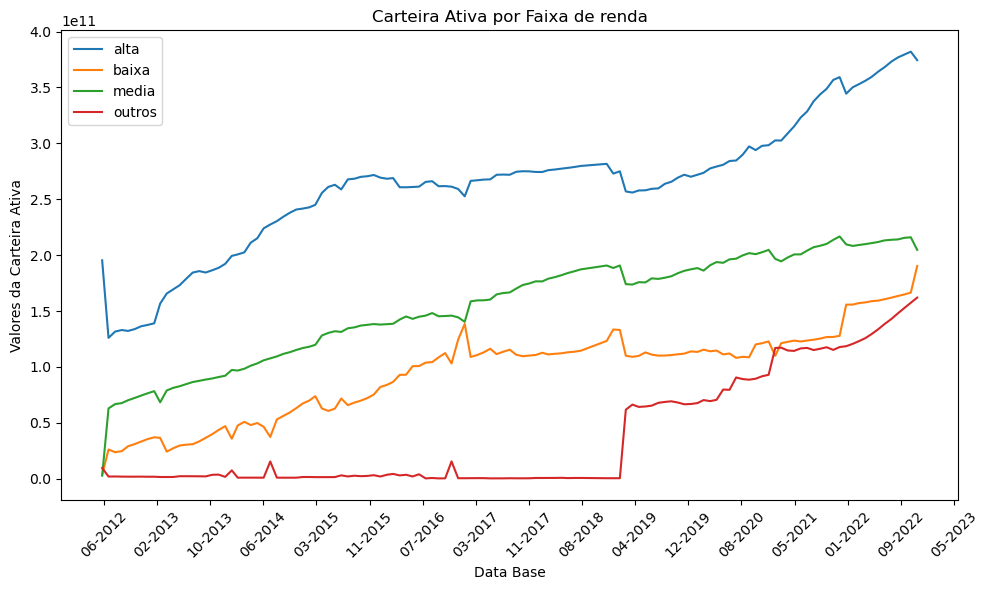

In [65]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
#df_grouped=df_renda.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum'}).reset_index()
#df_grouped = df_renda.groupby(['renda', 'data_base']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Faixa de renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('Carteira Ativa por Faixa de renda.png')
plt.tight_layout()
plt.show()

Vamos verificar a evolução por renda com e sem destinação específica.
Verificar se destinação específica é direcionado

In [66]:
# crédito direcionado por porte
#Agrupando por faixa de renda
df_renda=df.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_renda.head()

,data_base,renda,carteira_ativa,carteira_inadimplida_arrastada
0,2012-06-01,alta,195363094665.14,2428425717.79
1,2012-06-01,baixa,3193377094.50,58937334.38
2,2012-06-01,media,2784248422.29,69141961.17
3,2012-06-01,outros,9621719479.44,255054364.17
4,2012-07-01,alta,125987979601.39,1297423023.14


In [67]:
#Agrupando por faixa de renda com destinaçºao específica
df_renda=df.groupby(['data_base','renda','origem']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_renda.head()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
0,2012-06-01,alta,Com destinação específica,187593680963.04,2345279576.43
1,2012-06-01,alta,Sem destinação específica,7769413702.10,83146141.36
2,2012-06-01,baixa,Com destinação específica,3051385884.17,51532648.81
3,2012-06-01,baixa,Sem destinação específica,141991210.33,7404685.57
4,2012-06-01,media,Com destinação específica,2192445104.67,51228984.56


In [68]:
df_renda_com=df_renda[df_renda['origem']=='Com destinação específica']
df_renda_com.head()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
0,2012-06-01,alta,Com destinação específica,187593680963.04,2345279576.43
2,2012-06-01,baixa,Com destinação específica,3051385884.17,51532648.81
4,2012-06-01,media,Com destinação específica,2192445104.67,51228984.56
6,2012-06-01,outros,Com destinação específica,9391140351.02,242388077.22
8,2012-07-01,alta,Com destinação específica,118319082556.91,1226977912.66


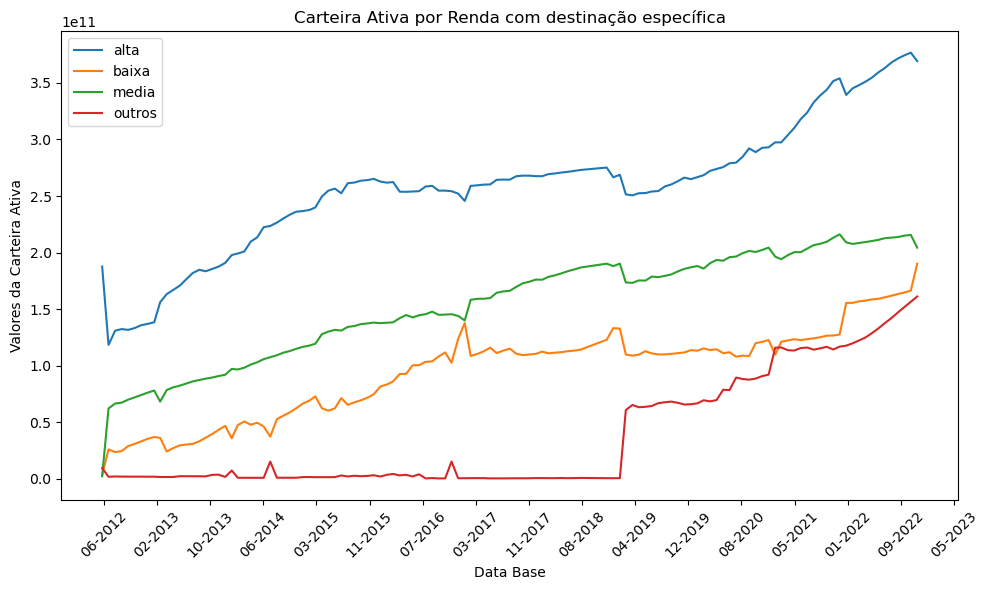

In [69]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
df_grouped = df_renda_com.groupby(['renda', 'data_base']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_grouped['renda'].unique():
    df_porte = df_grouped[df_grouped['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Renda com destinação específica')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

In [70]:
df_renda_sem=df_renda[df_renda['origem']!='Com destinação específica']
df_renda_sem.tail()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
983,2022-11-01,outros,Sem destinação específica,943339134.29,48839109.93
985,2022-12-01,alta,Sem destinação específica,5136301821.29,84728113.05
987,2022-12-01,baixa,Sem destinação específica,148240197.21,5324440.27
989,2022-12-01,media,Sem destinação específica,332964529.67,8582757.46
991,2022-12-01,outros,Sem destinação específica,908127763.25,40713718.13


In [71]:
df_renda_sem.tail()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
983,2022-11-01,outros,Sem destinação específica,943339134.29,48839109.93
985,2022-12-01,alta,Sem destinação específica,5136301821.29,84728113.05
987,2022-12-01,baixa,Sem destinação específica,148240197.21,5324440.27
989,2022-12-01,media,Sem destinação específica,332964529.67,8582757.46
991,2022-12-01,outros,Sem destinação específica,908127763.25,40713718.13


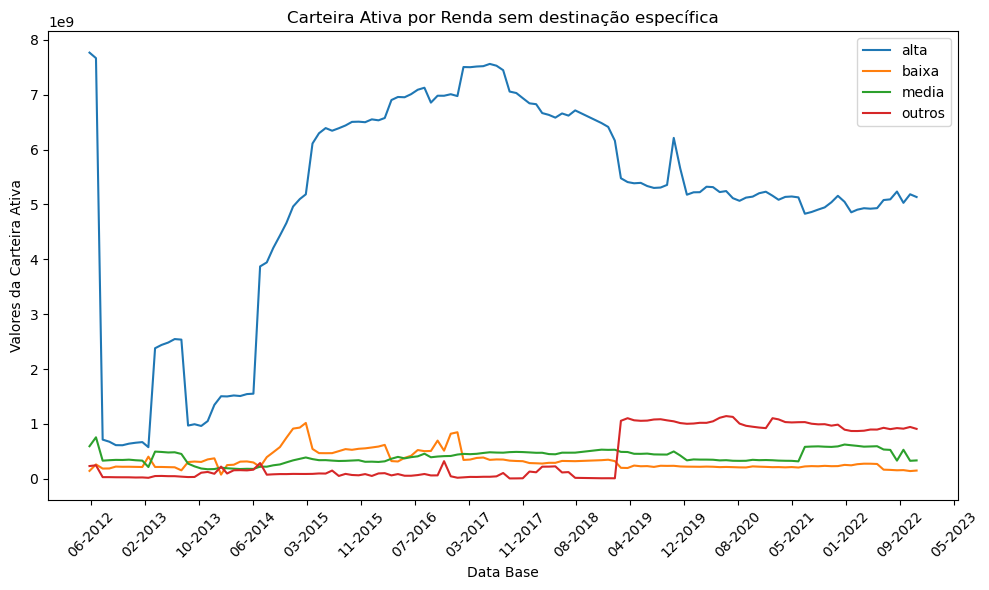

In [72]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
df_grouped = df_renda_sem.groupby(['renda', 'data_base']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_grouped['renda'].unique():
    df_porte = df_grouped[df_grouped['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Renda sem destinação específica')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

### Tiket medio

In [73]:
df_sup15.head()

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,06-2012,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,26,790708.27,78745.89,84224.82
1,06-2012,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,45,3724316.96,116526.89,123671.03
3,06-2012,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,53,2333231.60,22105.44,236600.78
4,06-2012,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,88,11172815.25,34605.73,875026.84
11,06-2012,AC,Bancário,NaN,PF - Empregado de empresa privada,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,125,6206348.40,152077.14,955782.04


In [74]:
df_sup15['numero_de_operacoes'] = df_sup15['numero_de_operacoes'].astype(int)

In [75]:
df_sup15['ticket_medio']= df_sup15['carteira_ativa']/df_sup15['numero_de_operacoes']

ticket medio por faixa de renda

In [76]:

#Agrupando por faixa de renda
#criar coluna 'renda'
# Função para mapear os valores da coluna "porte" para os valores da coluna "renda"
def mapear_renda(porte):
    if porte.strip() in ['PF - Sem rendimento',  'PF - Até 1 salário mínimo', 'PF - Mais de 1 a 2 salários mínimos', 'PF - Indisponível']:
        return "baixa"
    elif porte.strip() in ['PF - Mais de 2 a 3 salários mínimos', 'PF - Mais de 3 a 5 salários mínimos']:
        return "media"
    elif porte.strip() in ['PF - Acima de 20 salários mínimos', 'PF - Mais de 10 a 20 salários mínimos',  'PF - Mais de 5 a 10 salários mínimos']:
        return "alta"
   # elif porte.strip() in ['PF - Sem rendimento', 'PF - Indisponível']:
    #    return "alta"    
    else:
        return "outros"  # Caso haja algum valor não mapeado

# Aplicando a função para criar a coluna "renda"
df_sup15['renda'] = df_sup15['porte'].apply(mapear_renda)

In [77]:
# Converta a coluna 'data_base' para o tipo datetime
df_sup15['data_base'] = pd.to_datetime(df_sup15['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df_sup15['ano'] = df_sup15['data_base'].dt.year

In [78]:
ticket_por_renda = df_sup15.groupby(['ano','renda'])['ticket_medio'].mean().reset_index()
ticket_por_renda.head()

,ano,renda,ticket_medio
0,2012,alta,92283.39
1,2012,baixa,60607.19
2,2012,media,53735.44
3,2013,alta,103393.50
4,2013,baixa,60073.70


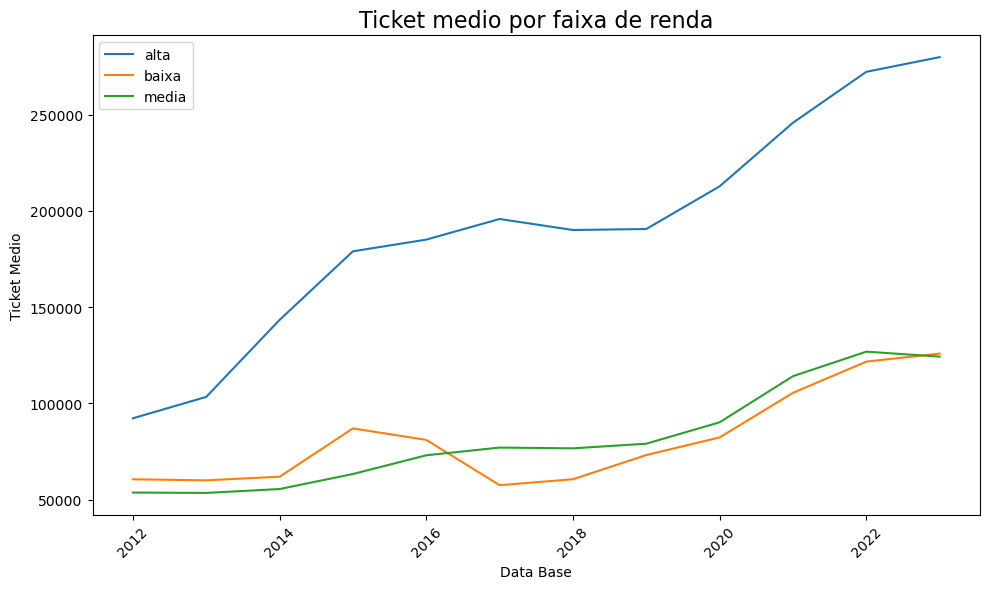

In [79]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
#ticket_por_renda = ticket_por_renda.groupby(['renda']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in ticket_por_renda['renda'].unique():
    df_porte = ticket_por_renda[ticket_por_renda['renda'] == porte]
    plt.plot(df_porte['ano'], df_porte['ticket_medio'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Ticket Medio')
plt.title('Ticket medio por faixa de renda', fontsize=16)

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x

plt.tight_layout()
plt.savefig('grafico_ticket_medio_por_renda.png')
plt.show()

In [80]:
df.head()

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,ano,renda
0,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,26,790708.27,78745.89,84224.82,2012,alta
1,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,45,3724316.96,116526.89,123671.03,2012,alta
2,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Sem destinação específica,Prefixado,<= 15,20760.35,0.00,18071.06,2012,alta
3,2012-06-01,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,53,2333231.60,22105.44,236600.78,2012,alta
4,2012-06-01,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,88,11172815.25,34605.73,875026.84,2012,alta


### Carteira ativa por ocupação

In [81]:
df_ocupacao=df.groupby(['data_base','ocupacao']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_ocupacao['inadimplencia']=df_ocupacao['carteira_inadimplida_arrastada']/df_ocupacao['carteira_ativa']
df_ocupacao.head()



,data_base,ocupacao,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia
0,2012-06-01,PF - Aposentado/pensionista,3792468702.90,68216649.20,0.02
1,2012-06-01,PF - Autônomo,16494547644.10,268407750.49,0.02
2,2012-06-01,PF - Empregado de empresa privada,51462782862.45,558234607.47,0.01
3,2012-06-01,PF - Empregado de entidades sem fins lucrativos,333763004.27,2538170.74,0.01
4,2012-06-01,PF - Empresário,29584965124.42,451808847.30,0.02


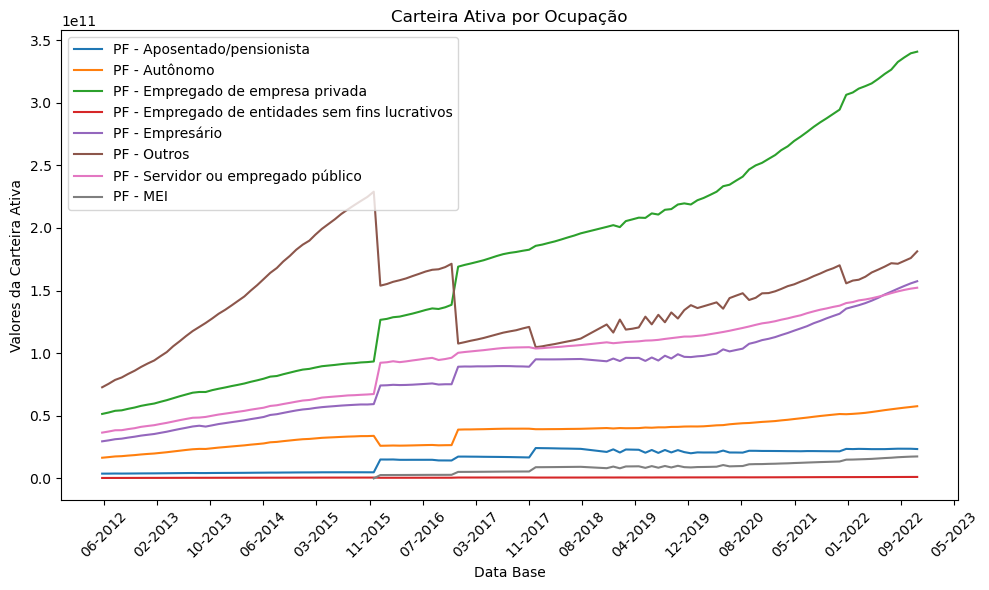

In [82]:

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_ocupacao['ocupacao'].unique():
    df_porte = df_ocupacao[df_ocupacao['ocupacao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Ocupação')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

### TCB e SR

In [83]:
df_tcb = df.groupby(['data_base','tcb'])['carteira_ativa'].sum().reset_index()
df_tcb.tail(20)

,data_base,tcb,carteira_ativa
286,2022-06-01,Cooperativas,1244581010.07
287,2022-06-01,Não bancário,3429026920.48
288,2022-07-01,Bancário,875603960025.37
289,2022-07-01,Cooperativas,1277159153.02
290,2022-07-01,Não bancário,3456438296.17
291,2022-08-01,Bancário,886093356560.91
292,2022-08-01,Cooperativas,1306181189.49
293,2022-08-01,Não bancário,4078917412.77
294,2022-09-01,Bancário,896745638852.37
295,2022-09-01,Cooperativas,1331208622.22


In [84]:
# Criar a coluna 'ano' com o ano da coluna 'data_base'
df_tcb['ano'] = df_tcb['data_base'].dt.year


In [85]:
#Criar tabela TCB anual
df_tcb_anual=df_tcb.groupby(['ano', 'tcb'])['carteira_ativa'].sum().reset_index()

# Calcular a soma da carteira ativa por ano
soma_por_ano = df_tcb_anual.groupby('ano')['carteira_ativa'].sum()

# Adicionar a coluna percentual
df_tcb_anual['percentual'] = df_tcb_anual.apply(lambda row: row['carteira_ativa'] / soma_por_ano[row['ano']] * 100, axis=1)

df_tcb_anual.head()

,ano,tcb,carteira_ativa,percentual
0,2012,Bancário,1588844765268.26,99.51
1,2012,Não bancário,7895002083.67,0.49
2,2013,Bancário,3462044437032.21,99.65
3,2013,Não bancário,12284016000.65,0.35
4,2014,Bancário,4481617570743.92,99.72


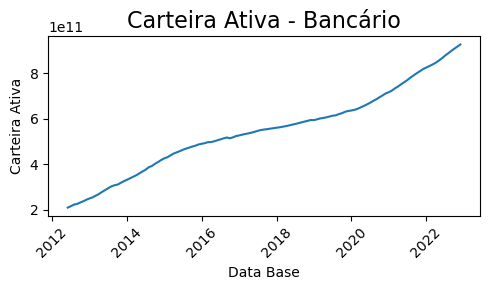

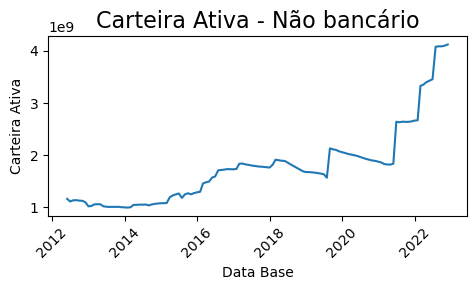

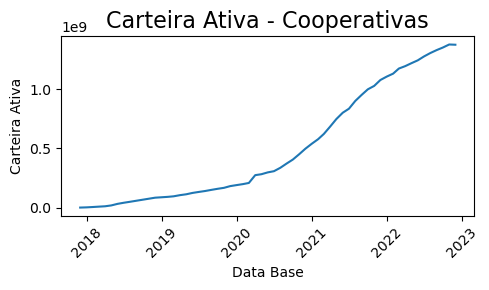

In [86]:
# Categorias únicas em tcb
categorias_tcb = df_tcb['tcb'].unique()

# Criando um gráfico para cada categoria de tcb
for categoria in categorias_tcb:
    # Filtrando o DataFrame para a categoria atual
    df_filtrado = df_tcb[df_tcb['tcb'] == categoria]

    # Criando um novo gráfico para a categoria
    plt.figure(figsize=(5, 3))
    
    # Plotando os dados da categoria atual
    plt.plot(df_filtrado['data_base'], df_filtrado['carteira_ativa'], label=categoria)

    # Configurando os rótulos dos eixos x e y
    plt.xlabel('Data Base')
    plt.ylabel('Carteira Ativa')
    plt.title(f'Carteira Ativa - {categoria}', fontsize=16)
    
    # Configurando a rotação dos rótulos no eixo x para melhor visualização
    plt.xticks(rotation=45)
    #plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x, se necessário
    #plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))  # Formatação da data, se necessário

    plt.tight_layout()
    # Salvando cada gráfico com um nome único baseado na categoria
    plt.savefig(f'grafico_carteira_tcb_{categoria}.png')
    
    # Exibindo o gráfico
    plt.show()


In [87]:
# Pivotando a tabela para ter os anos como colunas
formatted_df_tcb = df_tcb_anual.pivot(index='tcb', columns='ano', values='percentual')
formatted_df_tcb

ano,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
tcb,,,,,,,,,,,
Bancário,99.51,99.65,99.72,99.74,99.69,99.67,99.67,99.69,99.66,99.60,99.45
Cooperativas,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.02,0.05,0.11,0.14
Não bancário,0.49,0.35,0.28,0.26,0.31,0.33,0.32,0.29,0.29,0.29,0.41


In [88]:
# Caminho do arquivo Excel
caminho_arquivo_excel = 'tabela_tcb.xlsx'

# Salvar o DataFrame em um arquivo Excel
formatted_df_tcb.to_excel(caminho_arquivo_excel)

print(f'Tabela salva como "{caminho_arquivo_excel}"')

Tabela salva como "tabela_tcb.xlsx"


SR

In [89]:
df_sr = df.groupby(['data_base','sr'])['carteira_ativa'].sum().reset_index()
df_sr.tail(20)

,data_base,sr,carteira_ativa
314,2022-09-01,S1,877830026705.28
315,2022-09-01,S2,5595087393.56
316,2022-09-01,S3,16923454979.24
317,2022-09-01,S4,1042722393.64
318,2022-09-01,S5,773059924.80
319,2022-10-01,S1,887560018673.21
320,2022-10-01,S2,5637899949.04
321,2022-10-01,S3,17193312440.24
322,2022-10-01,S4,1054777317.94
323,2022-10-01,S5,760089666.15


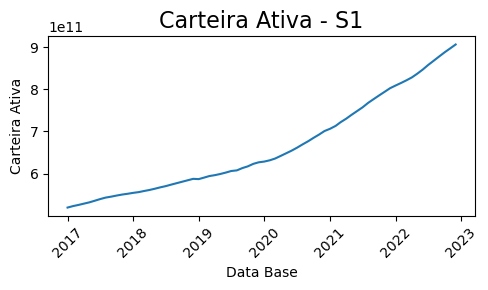

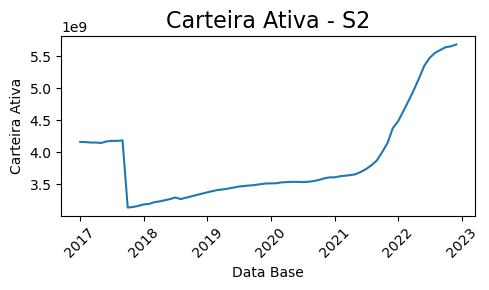

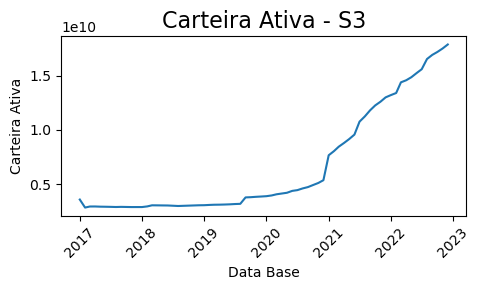

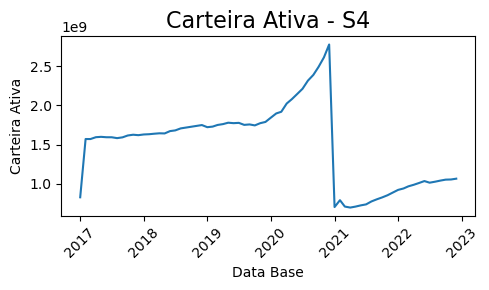

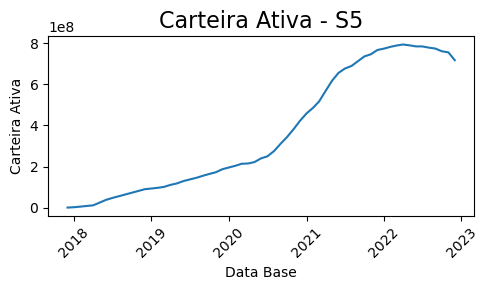

In [90]:
# Categorias únicas em tcb
categorias_sr = df_sr['sr'].unique()

# Criando um gráfico para cada categoria de tcb
for categoria in categorias_sr:
    # Filtrando o DataFrame para a categoria atual
    df_filtrado = df_sr[df_sr['sr'] == categoria]

    # Criando um novo gráfico para a categoria
    plt.figure(figsize=(5, 3))
    
    # Plotando os dados da categoria atual
    plt.plot(df_filtrado['data_base'], df_filtrado['carteira_ativa'], label=categoria)

    # Configurando os rótulos dos eixos x e y
    plt.xlabel('Data Base')
    plt.ylabel('Carteira Ativa')
    plt.title(f'Carteira Ativa - {categoria}', fontsize=16)
    
    # Configurando a rotação dos rótulos no eixo x para melhor visualização
    plt.xticks(rotation=45)
    #plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x, se necessário
    #plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))  # Formatação da data, se necessário

    plt.tight_layout()
    # Salvando cada gráfico com um nome único baseado na categoria
    plt.savefig(f'grafico_carteira_tcb_{categoria}.png')
    
    # Exibindo o gráfico
    plt.show()


In [91]:
# Criar a coluna 'ano' com o ano da coluna 'data_base'
df_sr['ano'] = df_sr['data_base'].dt.year

In [92]:
df_sr.head()

,data_base,sr,carteira_ativa,ano
0,2017-01-01,S1,519741568556.91,2017
1,2017-01-01,S2,4157759449.66,2017
2,2017-01-01,S3,3588545997.92,2017
3,2017-01-01,S4,829992323.40,2017
4,2017-02-01,S1,523289058823.91,2017


In [93]:

#Criar tabela SR anual
df_sr_anual=df_sr.groupby(['ano', 'sr'])['carteira_ativa'].sum().reset_index()

# Calcular a soma da carteira ativa por ano
soma_por_ano_sr = df_sr_anual.groupby('ano')['carteira_ativa'].sum()

# Adicionar a coluna percentual
df_sr_anual['percentual'] = df_sr_anual.apply(lambda row: row['carteira_ativa'] / soma_por_ano_sr[row['ano']] * 100, axis=1)

df_sr_anual.head()


,ano,sr,carteira_ativa,percentual
0,2017,S1,6445558873519.03,98.46
1,2017,S2,46881527333.26,0.72
2,2017,S3,35622174111.34,0.54
3,2017,S4,18398289731.57,0.28
4,2017,S5,1112897.19,0.00


In [94]:
# Pivotando a tabela para ter os anos como colunas
formatted_df_sr = df_sr_anual.pivot(index='sr', columns='ano', values='percentual')
formatted_df_sr

ano,2017,2018,2019,2020,2021,2022
sr,,,,,,
S1,98.46,98.61,98.58,98.43,97.98,97.42
S2,0.72,0.57,0.56,0.53,0.50,0.60
S3,0.54,0.53,0.55,0.67,1.34,1.78
S4,0.28,0.29,0.29,0.33,0.10,0.12
S5,0.00,0.01,0.02,0.04,0.08,0.09


In [95]:
# Caminho do arquivo Excel
caminho_arquivo_excel = 'tabela_sr.xlsx'

# Salvar o DataFrame em um arquivo Excel
formatted_df_sr.to_excel(caminho_arquivo_excel)

print(f'Tabela salva como "{caminho_arquivo_excel}"')

Tabela salva como "tabela_sr.xlsx"


### Inadimplencia por renda

In [96]:
df_total.head()

,data_base,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia,ano
0,2012-06-01,210962439661.37,2811559377.51,0.01,2012
1,2012-07-01,216932554609.75,2721726506.96,0.01,2012
2,2012-08-01,224032328505.99,2819379659.18,0.01,2012
3,2012-09-01,227077645539.52,3022446877.94,0.01,2012
4,2012-10-01,233239688360.74,3016822750.07,0.01,2012


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


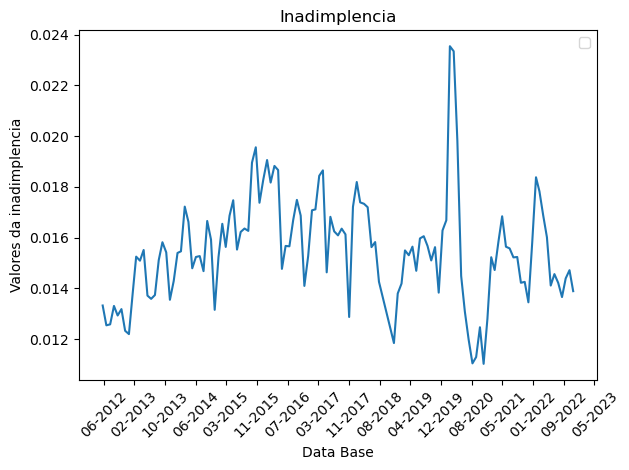

In [97]:
# Configurando os rótulos dos eixos x e y

plt.plot(df_total['data_base'], df_total['inadimplencia'])

plt.xlabel('Data Base')
plt.ylabel('Valores da inadimplencia')
plt.title('Inadimplencia')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

In [98]:
#Agrupando por faixa de renda
#criar coluna 'renda'
# Função para mapear os valores da coluna "porte" para os valores da coluna "renda"
def mapear_renda(porte):
    if porte.strip() in [ 'PF - Até 1 salário mínimo', 'PF - Mais de 1 a 2 salários mínimos']:
        return "baixa"
    elif porte.strip() in ['PF - Mais de 2 a 3 salários mínimos', 'PF - Mais de 3 a 5 salários mínimos']:
        return "media"
    elif porte.strip() in ['PF - Acima de 20 salários mínimos', 'PF - Mais de 5 a 10 salários mínimos', 'PF - Mais de 10 a 20 salários mínimos']:
        return "alta"
    #elif porte.strip() in ['PF - Sem rendimento']:
    #    return "Sem Renda"    
    else:
        return "outros"  # Caso haja algum valor não mapeado

# Aplicando a função para criar a coluna "renda"
df['renda'] = df['porte'].apply(mapear_renda)




df_renda=df.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_renda['inadimplencia']=df_renda['carteira_inadimplida_arrastada']/df_renda['carteira_ativa']
df_renda.head()


,data_base,renda,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia
0,2012-06-01,alta,195363094665.14,2428425717.79,0.01
1,2012-06-01,baixa,3193377094.50,58937334.38,0.02
2,2012-06-01,media,2784248422.29,69141961.17,0.02
3,2012-06-01,outros,9621719479.44,255054364.17,0.03
4,2012-07-01,alta,125987979601.39,1297423023.14,0.01


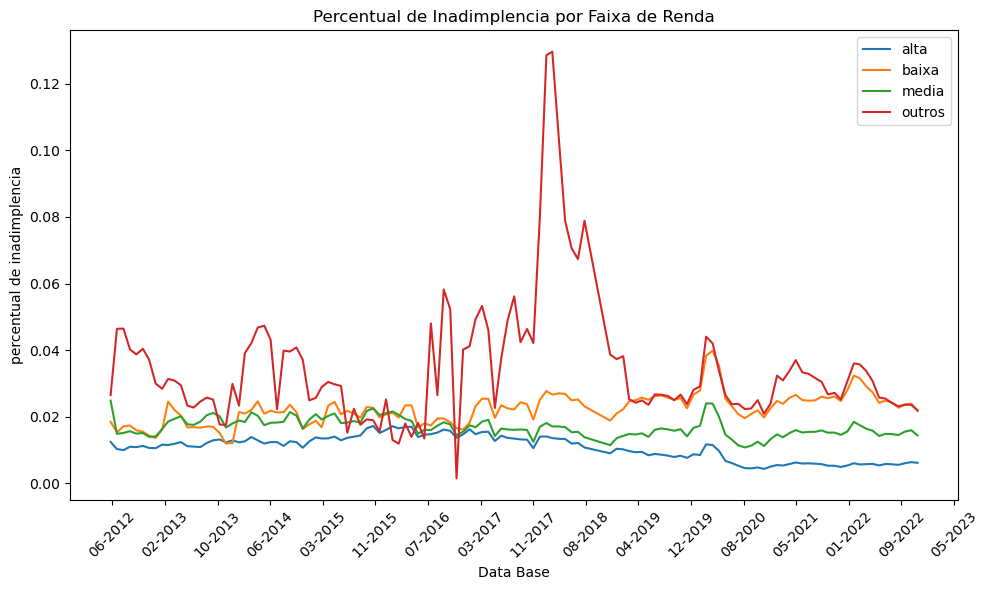

In [99]:

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('percentual de inadimplencia')
plt.title('Percentual de Inadimplencia por Faixa de Renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

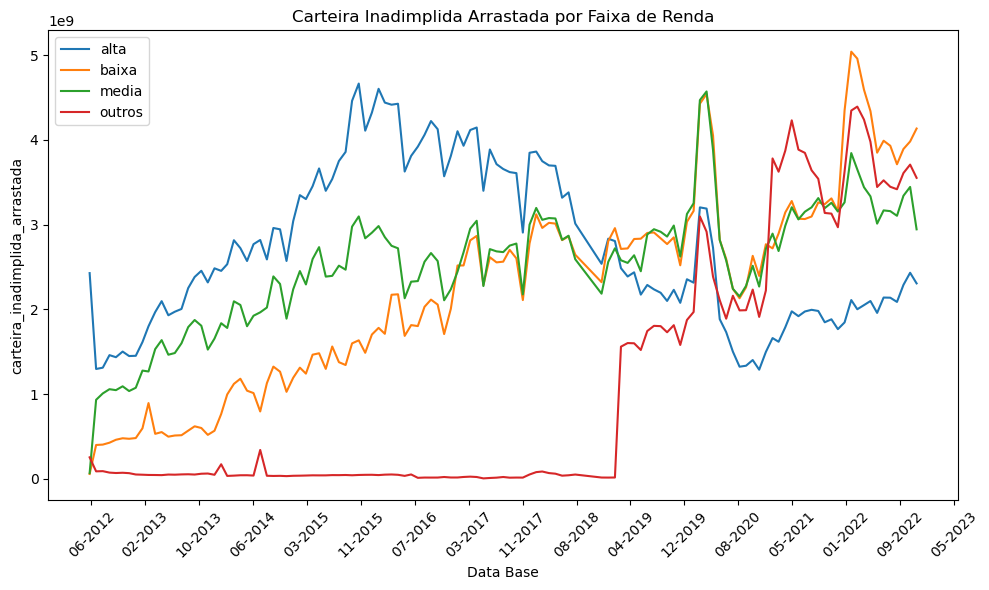

In [100]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_inadimplida_arrastada'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('carteira_inadimplida_arrastada')
plt.title('Carteira Inadimplida Arrastada por Faixa de Renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

### Inadimplencia por ocupação

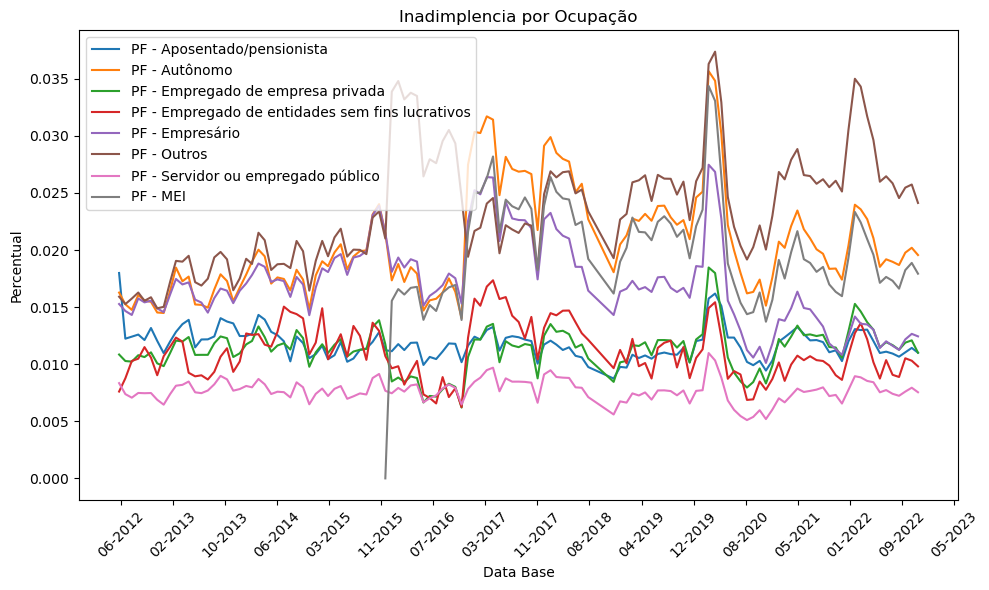

In [101]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_ocupacao['ocupacao'].unique():
    df_porte = df_ocupacao[df_ocupacao['ocupacao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Percentual')
plt.title('Inadimplencia por Ocupação')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

### Inadimplencia por região

In [102]:
df_estado=df.groupby(['data_base','uf']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_estado.head()

,data_base,uf,carteira_ativa,carteira_inadimplida_arrastada
0,2012-06-01,AC,279495633.36,4385848.80
1,2012-06-01,AL,2081764991.08,43180351.64
2,2012-06-01,AM,1206196793.89,15007251.37
3,2012-06-01,AP,109767427.31,1352673.89
4,2012-06-01,BA,7287112919.28,122765449.19


In [103]:

# Use uma condição para atribuir valores à coluna 'regiao' com base na UF de cada estado
for idx, row in df_estado.iterrows():
    uf = row['uf']
    if uf in ['SP', 'MG', 'RJ', 'ES']:
        df_estado.at[idx, 'regiao'] = 'sudeste'
    elif uf in ['AM', 'PA', 'RR', 'AP', 'RO', 'AC', 'TO']:
        df_estado.at[idx, 'regiao'] = 'norte'
    elif uf in ['MT', 'MS', 'GO', 'DF']:
        df_estado.at[idx, 'regiao'] = 'centro-oeste'
    elif uf in ['PI', 'MA', 'PE', 'RN', 'PB', 'CE', 'BA', 'AL', 'SE']:
        df_estado.at[idx, 'regiao'] = 'nordeste'
    else:
        df_estado.at[idx, 'regiao'] = 'outra'

df_estado.head()


,data_base,uf,carteira_ativa,carteira_inadimplida_arrastada,regiao
0,2012-06-01,AC,279495633.36,4385848.80,norte
1,2012-06-01,AL,2081764991.08,43180351.64,nordeste
2,2012-06-01,AM,1206196793.89,15007251.37,norte
3,2012-06-01,AP,109767427.31,1352673.89,norte
4,2012-06-01,BA,7287112919.28,122765449.19,nordeste


In [104]:
df_regiao=df_estado.groupby(['data_base','regiao']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_regiao['inadimplencia']=df_regiao['carteira_inadimplida_arrastada']/df_regiao['carteira_ativa']
df_regiao.head()

,data_base,regiao,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia
0,2012-06-01,centro-oeste,21771752142.60,371539435.41,0.02
1,2012-06-01,nordeste,26943216299.63,444905097.62,0.02
2,2012-06-01,norte,5474826444.41,77653039.95,0.01
3,2012-06-01,outra,40613838182.73,469909361.95,0.01
4,2012-06-01,sudeste,116158806592.00,1447552442.58,0.01


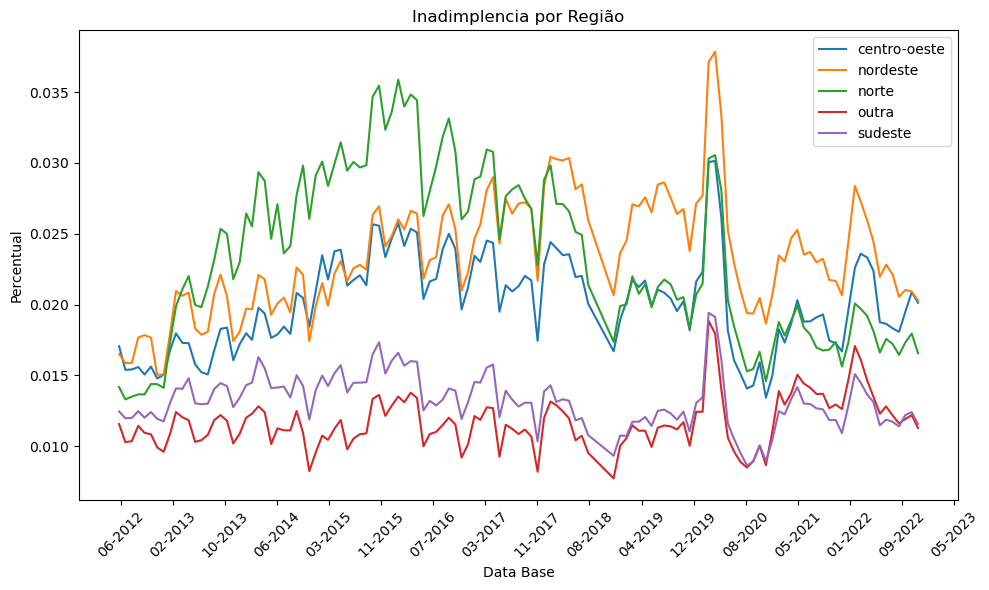

In [105]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_regiao['regiao'].unique():
    df_porte = df_regiao[df_regiao['regiao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Percentual')
plt.title('Inadimplencia por Região')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

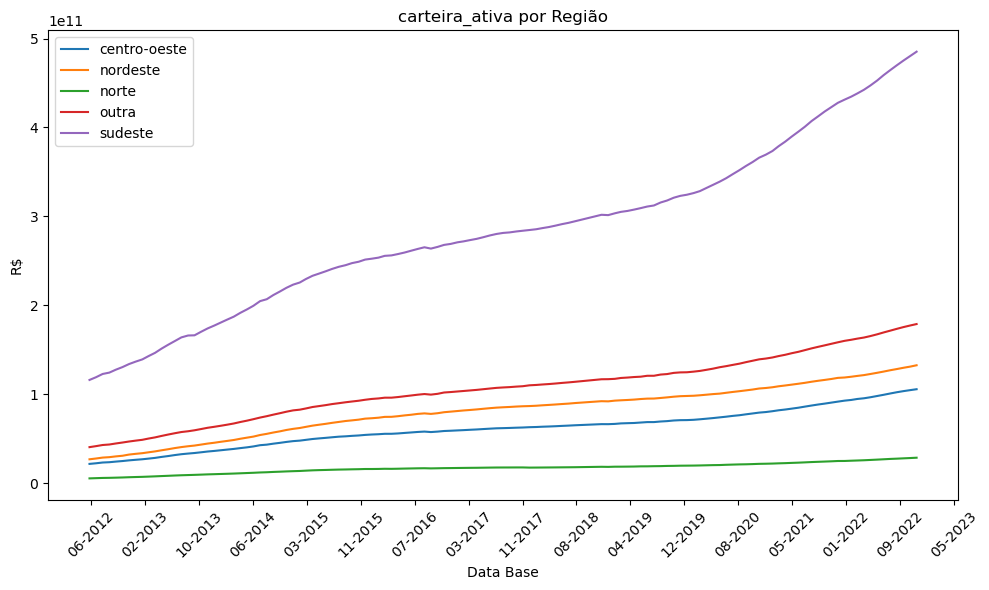

In [106]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_regiao['regiao'].unique():
    df_porte = df_regiao[df_regiao['regiao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('R$')
plt.title('carteira_ativa por Região')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

# Definindo dados

In [107]:
df_tratada.head(2)

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,media_contratos,index
0,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,26,790708.27,78745.89,84224.82,30411.86,NaN
1,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,45,3724316.96,116526.89,123671.03,82762.60,NaN


In [108]:
df_tratada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121395 entries, 0 to 752203
Data columns (total 14 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   data_base                       1121395 non-null  datetime64[ns]
 1   uf                              1121395 non-null  object        
 2   tcb                             1121395 non-null  object        
 3   sr                              814859 non-null   object        
 4   ocupacao                        1121395 non-null  object        
 5   porte                           1121395 non-null  object        
 6   origem                          1121395 non-null  object        
 7   indexador                       1121395 non-null  object        
 8   numero_de_operacoes             1121395 non-null  int64         
 9   carteira_ativa                  1121395 non-null  float64       
 10  carteira_inadimplida_arrastada  1121395 non-null

In [109]:
df_agrupado = df_tratada.groupby(['data_base', 'uf', 'ocupacao', 'porte', 'indexador']).sum(min_count=1)[['numero_de_operacoes', 'carteira_ativa', 'carteira_inadimplida_arrastada']].reset_index()
df_agrupado1 = df_tratada.groupby(['data_base', 'uf', 'ocupacao', 'porte', 'indexador']).sum(min_count=1)[['carteira_ativa']].reset_index()



In [120]:
df_agrupado1.head()

,uf,ocupacao,porte,indexador,carteira_ativa
data_base,,,,,
2012-06-01,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Prefixado,811468.62
2012-06-01,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Pós-fixado,3724316.96
2012-06-01,AC,PF - Aposentado/pensionista,PF - Indisponível,Pós-fixado,298715.54
2012-06-01,AC,PF - Aposentado/pensionista,PF - Mais de 1 a 2 salários mínimos,Pós-fixado,10696.54
2012-06-01,AC,PF - Aposentado/pensionista,PF - Mais de 3 a 5 salários mínimos,Pós-fixado,50800.25


In [111]:
df_agrupado1.shape


(540294, 6)

In [118]:
df_agrupado1.set_index('data_base', inplace=True)

# Modelo

In [122]:
from sklearn.preprocessing import LabelEncoder
# vai transformar as colunas de texto em números, ex: profissoes vai sair de cientista, professor, mecanico, etc para 0, 1, 2, etc
codificador = LabelEncoder()

# só não aplicamos na coluna de score_credito que é o nosso objetivo
for coluna in df_agrupado1.columns:
    if df_agrupado1[coluna].dtype == "object" and coluna != "score_credito":
        df_agrupado1[coluna] = codificador.fit_transform(df_agrupado1[coluna])

# verificando se realmente

In [124]:
print(df_agrupado1.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540294 entries, 2012-06-01 to 2023-10-01
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uf              540294 non-null  int32  
 1   ocupacao        540294 non-null  int32  
 2   porte           540294 non-null  int32  
 3   indexador       540294 non-null  int32  
 4   carteira_ativa  540294 non-null  float64
dtypes: float64(1), int32(4)
memory usage: 16.5 MB
None
